<a href="https://colab.research.google.com/github/sofia0813/talleres-python-2023/blob/main/trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, Normalizer, OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [81]:
import pandas as pd


In [92]:
from google.colab import files
uploaded = files.upload()

Saving BaseDatosPython.xlsx to BaseDatosPython (3).xlsx


In [93]:
import io
df = pd.read_excel(io.BytesIO(uploaded['BaseDatosPython (3).xlsx']))
print(df.shape)

(839, 24)


In [ ]:
#obtener el conteo de grado del tumor 0=no 1=si
df['Grade'].value_counts()

0    487
1    352
Name: Grade, dtype: int64

Text(0.5, 1.0, 'Grade: Si=1,No=0')

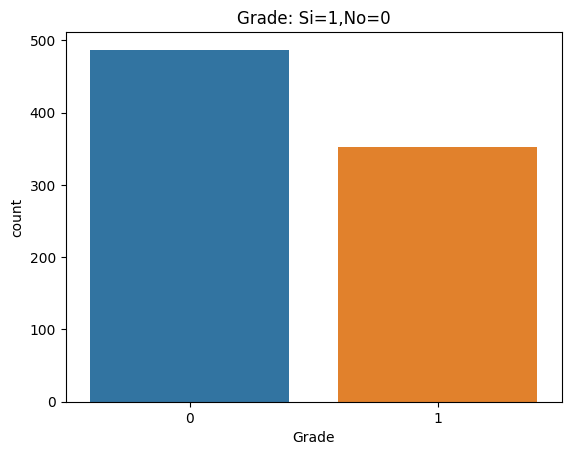

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x="Grade")
plt.title("Grade: Si=1,No=0")

In [ ]:
#Encontrar datos o "null" (si hay alguno)
df.isnull().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

In [ ]:
df.dtypes

Grade                 int64
Gender                int64
Age_at_diagnosis    float64
Race                  int64
IDH1                  int64
TP53                  int64
ATRX                  int64
PTEN                  int64
EGFR                  int64
CIC                   int64
MUC16                 int64
PIK3CA                int64
NF1                   int64
PIK3R1                int64
FUBP1                 int64
RB1                   int64
NOTCH1                int64
BCOR                  int64
CSMD3                 int64
SMARCA4               int64
GRIN2A                int64
IDH2                  int64
FAT4                  int64
PDGFRA                int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt

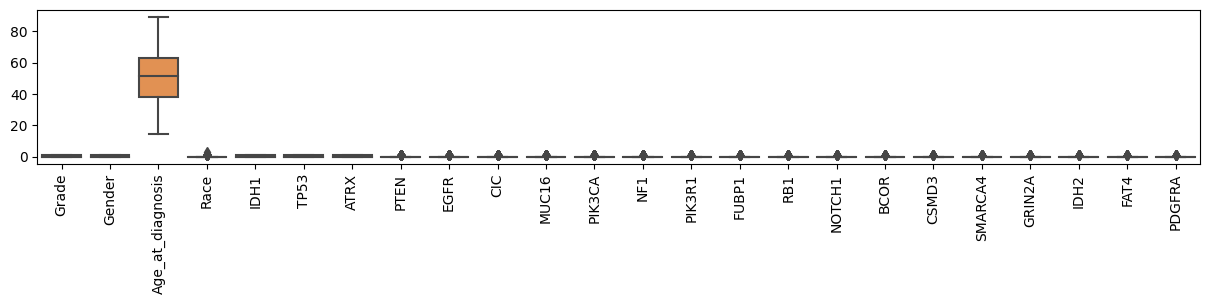

In [ ]:
plt.figure(figsize=(15, 2))
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0.0,0.0,0.492587,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.324563,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.277147,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.245225,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.228262,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


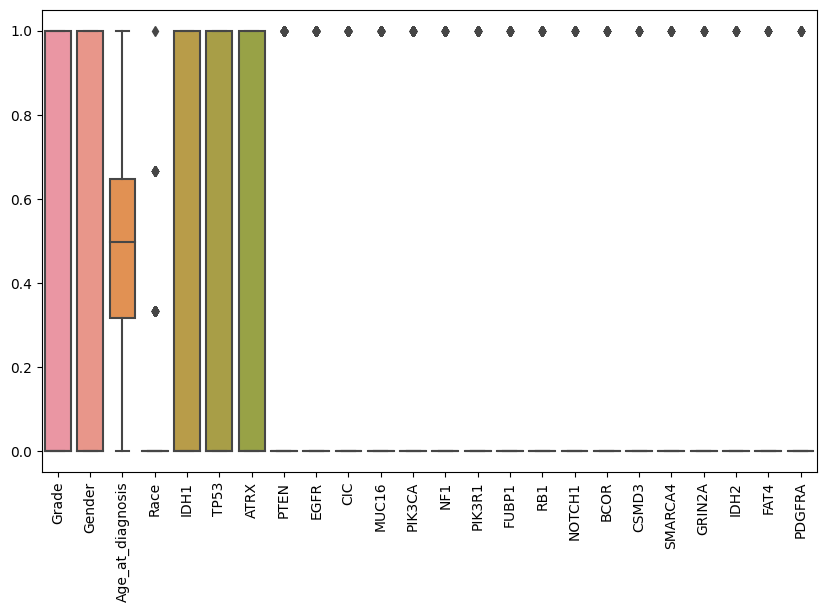

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_norm)
plt.xticks(rotation=90);

In [102]:
X=df.iloc[:, 22: 89].values
Y=df.iloc[:, 0].values
Y=Y.reshape(Y.size,1)


In [115]:
# Definir el conjunto de entrenamiento y el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# usamos 30% de los datos para la prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((587, 2), (252, 2), (587,), (252,))

In [116]:
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]

In [117]:
def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]

In [118]:
def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]

In [119]:
def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]

In [120]:
def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)

In [121]:
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)

In [122]:
from sklearn.metrics import confusion_matrix, make_scorer
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

In [123]:
def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])

In [124]:
acc = []
roc = []

In [125]:
model1 = GaussianNB()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

In [126]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

Naive Bayes : 
Accuracy: 0.6428571428571429
F1 score: 0.16666666666666666
Recall: 0.09574468085106383
Precision: 0.6428571428571429

 confussion matrix:
 [[153   5]
 [ 85   9]]


In [127]:
# Segundo Modelo - Regresión logística
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2.score(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

In [128]:
# Accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Logistic Regression : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Logistic Regression : 
Accuracy: 0.6349206349206349
F1 score: 0.09803921568627451
Recall: 0.05319148936170213
Precision: 0.625

 confussion matrix:
 [[155   3]
 [ 89   5]]


In [129]:
# Tercer Modelo - Support Vector Machine
model3 = SVC(gamma='auto', kernel='linear')
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

In [130]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Support Vector Machine : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Support Vector Machine : 
Accuracy: 0.6349206349206349
F1 score: 0.09803921568627451
Recall: 0.05319148936170213
Precision: 0.625

 confussion matrix:
 [[155   3]
 [ 89   5]]


In [131]:
# Cuarto Modelo - KNN
model4 = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
y_pred_train = model4.predict(X_train)

In [132]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("K-Nearest Neighbors : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
K-Nearest Neighbors : 
Accuracy: 0.6349206349206349
F1 score: 0.09803921568627451
Recall: 0.05319148936170213
Precision: 0.625

 confussion matrix:
 [[155   3]
 [ 89   5]]


In [133]:
model5 = RandomForestClassifier(n_estimators=20, max_depth=10)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
y_pred_train = model5.predict(X_train)

In [134]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Random Forest : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Random Forest : 
Accuracy: 0.6349206349206349
F1 score: 0.09803921568627451
Recall: 0.05319148936170213
Precision: 0.625

 confussion matrix:
 [[155   3]
 [ 89   5]]


In [135]:
# Sexto Modelo - Árboles de decisión
model6 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
model6.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [136]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Decision Tree : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Decision Tree : 
Accuracy: 0.6349206349206349
F1 score: 0.09803921568627451
Recall: 0.05319148936170213
Precision: 0.625

 confussion matrix:
 [[155   3]
 [ 89   5]]
